In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 is:  (628, 1200)
image2 is:  (314, 600)


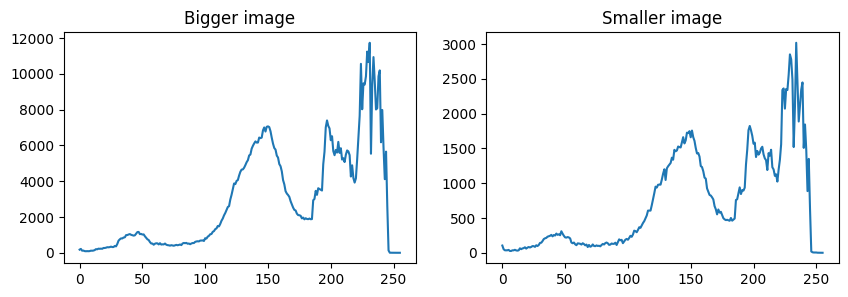

In [2]:
#load the same images but in different size in grays
image1=cv2.imread("images/Cow.jpg",0)
image2=cv2.imread("images/Cow-small.jpg",0)
#Print dimentions
print("image1 is: ", image1.shape)
print("image2 is: ", image2.shape)
#Calculate histograms
histogram1=cv2.calcHist([image1],[0],None,[256],[0,256])
histogram2=cv2.calcHist([image2],[0],None,[256],[0,256])
#plot 
plt.figure(figsize=[10,3])
plt.subplot(121);plt.plot(histogram1);plt.title("Bigger image");
plt.subplot(122);plt.plot(histogram2);plt.title("Smaller image");
    


# Normalizing histograms 

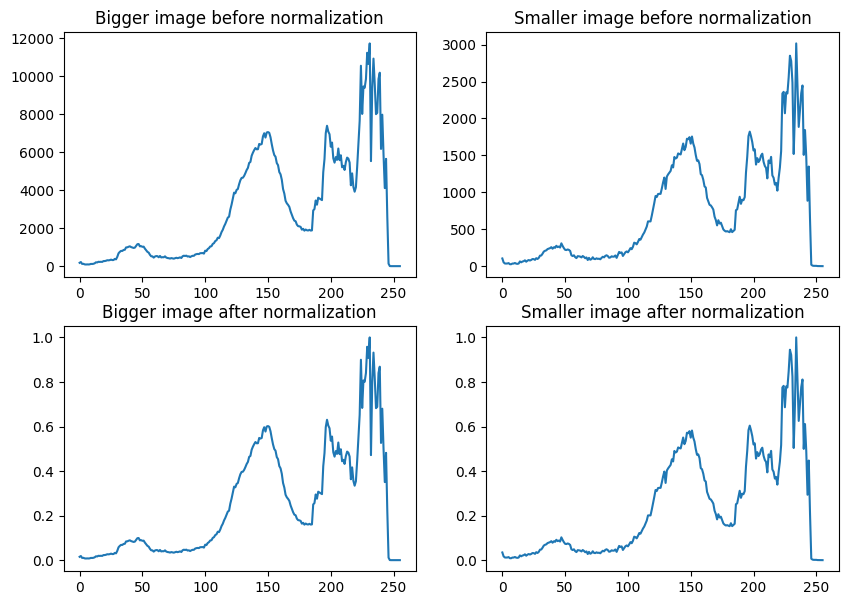

In [3]:
#load images in gray-scale
image1 = cv2.imread('images/Cow.jpg',0)
image2 = cv2.imread('images/Cow-small.jpg',0)

#calculate histograms
histogram1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
histogram2 = cv2.calcHist([image2], [0], None, [256], [0, 256])

#copy histograms
histogram1_normalized = histogram1.copy()
histogram2_normalized = histogram2.copy()

#normalize histograms
cv2.normalize(histogram1, histogram1_normalized, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
cv2.normalize(histogram2, histogram2_normalized, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

#plot
plt.figure(figsize=[10,7])
plt.subplot(221);plt.plot(histogram1);plt.title("Bigger image before normalization");
plt.subplot(222);plt.plot(histogram2);plt.title("Smaller image before normalization");

plt.subplot(223);plt.plot(histogram1_normalized);plt.title("Bigger image after normalization");
plt.subplot(224);plt.plot(histogram2_normalized);plt.title("Smaller image after normalization");

# Comparing histograms

Perfect: 0.0, 
Base-Half:0.3106651880104802, 
Base-Test(1):0.7498451093056697, 
Base-Test(2) :0.9464567389602986


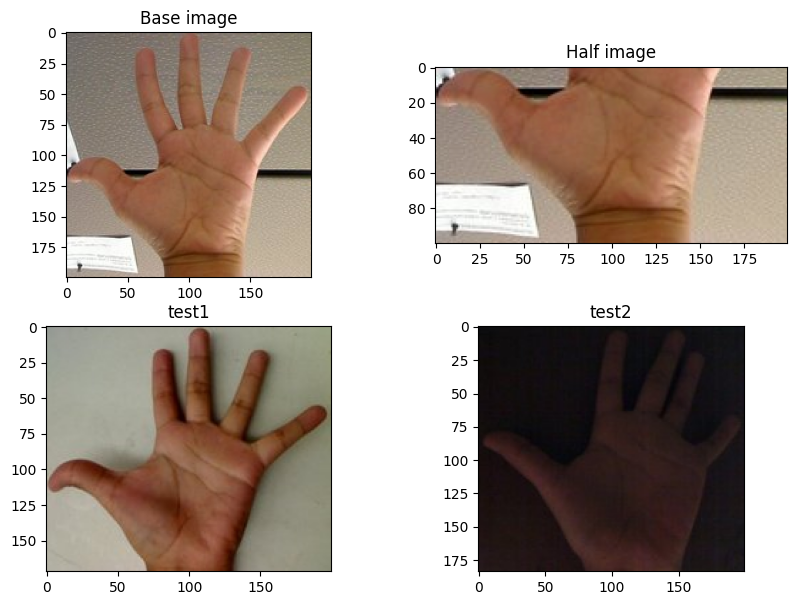

In [5]:
src_base = cv2.imread("images/Histogram_Comparison_Source_0.jpg")
src_test1 = cv2.imread("images/Histogram_Comparison_Source_1.jpg")
src_test2 = cv2.imread("images/Histogram_Comparison_Source_2.jpg")

hsv_base = cv2.cvtColor(src_base, cv2.COLOR_BGR2HSV)
hsv_test1 = cv2.cvtColor(src_test1, cv2.COLOR_BGR2HSV)
hsv_test2 = cv2.cvtColor(src_test2, cv2.COLOR_BGR2HSV)

# create an image of half the base image (in HSV format):
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]
                       
               
hist_base = cv2.calcHist([hsv_base], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_half_down = cv2.calcHist([hsv_half_down], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test1 = cv2.calcHist([hsv_test1], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test2 = cv2.calcHist([hsv_test2], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
                       
base_base = cv2.compareHist(hist_base, hist_base, cv2.HISTCMP_BHATTACHARYYA)
base_half = cv2.compareHist(hist_base, hist_half_down, cv2.HISTCMP_BHATTACHARYYA)
base_test1 = cv2.compareHist(hist_base, hist_test1, cv2.HISTCMP_BHATTACHARYYA)
base_test2 = cv2.compareHist(hist_base, hist_test2, cv2.HISTCMP_BHATTACHARYYA)


plt.figure(figsize=[10,7])
plt.subplot(221);plt.imshow(src_base[...,::-1]);plt.title("Base image");
plt.subplot(222);plt.imshow(cv2.cvtColor(hsv_half_down, cv2.COLOR_HSV2RGB));plt.title("Half image");
plt.subplot(223);plt.imshow(src_test1[...,::-1]);plt.title("test1");
plt.subplot(224);plt.imshow(src_test2[...,::-1]);plt.title("test2");


print('Perfect: {}, \nBase-Half:{}, \nBase-Test(1):{}, \nBase-Test(2) :{}'.format(\
          base_base, base_half, base_test1, base_test2))

## Other methods for comparing 

Method: cv2.HISTCMP_BHATTACHARYYA
 -Perfect: 0.0, 
 -Base-Half:0.3106651880104802, 
 -Base-Test(1):0.7498451093056697, 
 -Base-Test(2) :0.9464567389602986
---
Method: cv2.HISTCMP_CHISQR
 -Perfect: 0.0, 
 -Base-Half:34.033593842938195, 
 -Base-Test(1):661.1060254505742, 
 -Base-Test(2) :1712.5495738593195
---
Method: cv2.HISTCMP_CORREL
 -Perfect: 1.0, 
 -Base-Half:0.8263068078730407, 
 -Base-Test(1):0.0820323152728836, 
 -Base-Test(2) :0.02074296934219765
---
Method: cv2.HISTCMP_INTERSECT
 -Perfect: 92.59259354695678, 
 -Base-Half:46.73931341874413, 
 -Base-Test(1):11.652202861383557, 
 -Base-Test(2) :4.535974983125925
---
Method: cv2.HISTCMP_KL_DIV
 -Perfect: 0.0, 
 -Base-Half:180.49322003660623, 
 -Base-Test(1):653.7298110863732, 
 -Base-Test(2) :1676.0983346142905
---


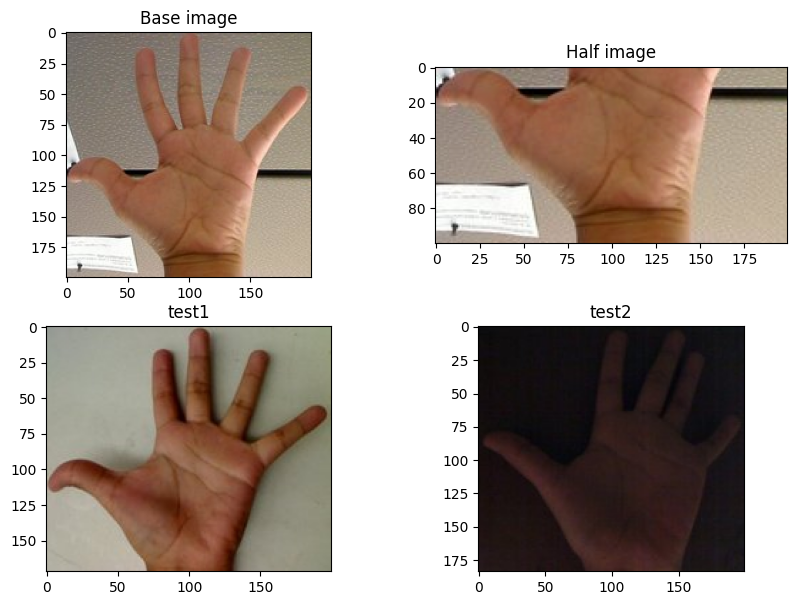

In [6]:
src_base = cv2.imread("images/Histogram_Comparison_Source_0.jpg")
src_test1 = cv2.imread("images/Histogram_Comparison_Source_1.jpg")
src_test2 = cv2.imread("images/Histogram_Comparison_Source_2.jpg")

hsv_base = cv2.cvtColor(src_base, cv2.COLOR_BGR2HSV)
hsv_test1 = cv2.cvtColor(src_test1, cv2.COLOR_BGR2HSV)
hsv_test2 = cv2.cvtColor(src_test2, cv2.COLOR_BGR2HSV)

# create an image of half the base image (in HSV format):
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]
                       
               
hist_base = cv2.calcHist([hsv_base], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_half_down = cv2.calcHist([hsv_half_down], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test1 = cv2.calcHist([hsv_test1], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
hist_test2 = cv2.calcHist([hsv_test2], [0, 1], None,  [180,256], [0,180,0,256])
cv2.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=[10,7])
plt.subplot(221);plt.imshow(src_base[...,::-1]);plt.title("Base image");
plt.subplot(222);plt.imshow(cv2.cvtColor(hsv_half_down, cv2.COLOR_HSV2RGB));plt.title("Half image");
plt.subplot(223);plt.imshow(src_test1[...,::-1]);plt.title("test1");
plt.subplot(224);plt.imshow(src_test2[...,::-1]);plt.title("test2");


methods = [cv2.HISTCMP_BHATTACHARYYA, cv2.HISTCMP_CHISQR, cv2.HISTCMP_CORREL, cv2.HISTCMP_INTERSECT, cv2.HISTCMP_KL_DIV]
method_names = ['cv2.HISTCMP_BHATTACHARYYA', 'cv2.HISTCMP_CHISQR', 'cv2.HISTCMP_CORREL', 'cv2.HISTCMP_INTERSECT', 'cv2.HISTCMP_KL_DIV']

for method, method_name in zip(methods, method_names):
    print("Method:", method_name)
    base_base = cv2.compareHist(hist_base, hist_base, method)
    base_half = cv2.compareHist(hist_base, hist_half_down, method)
    base_test1 = cv2.compareHist(hist_base, hist_test1, method)
    base_test2 = cv2.compareHist(hist_base, hist_test2, method)
    print(' -Perfect: {}, \n -Base-Half:{}, \n -Base-Test(1):{}, \n -Base-Test(2) :{}\n---'.format(\
              base_base, base_half, base_test1, base_test2))